In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
x = [2,4,6,8,10]
x2 = [1,3,5,7,9]
y = [4,7,4,7,3]
y2 = [5,3,2,6,2]

# Bar Charts

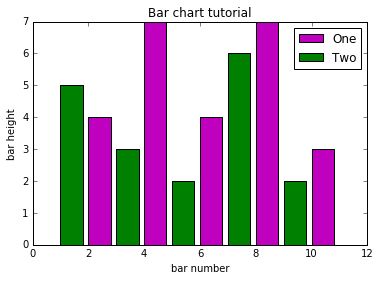

In [42]:
plt.bar(x,y,label="One", color = "m")
plt.bar(x2,y2,label="Two", color = "g")
plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar chart tutorial")
plt.legend()
plt.show()

# Histograms

Bar charts are good for comparing things in major categories but very poor for illustrating distributions.  Histograms show distributions.

In [43]:
test_scores =[55,45,88,75, 43, 56, 89, 98, 55, 54, 77, 88, 81, 82, 78, 89, 92, 65, 76, 73, 72, 84, 89]

In [44]:
'''x = [x for x in range(len(test_scores))]
plt.bar(x,test_scores)
plt.show()

'''

'x = [x for x in range(len(test_scores))]\nplt.bar(x,test_scores)\nplt.show()\n\n'

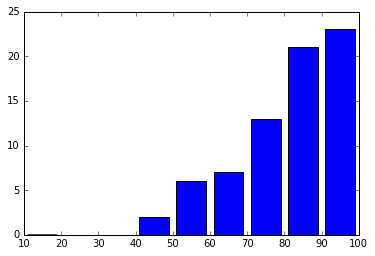

In [45]:
bins = [10,20,30,40,50,60,70,80,90,100]
plt.hist(test_scores, bins, histtype='bar', cumulative=True, rwidth=0.8)
plt.show()

# Scatter Plots

Used when you're trying to show groups or correlation or trending.  Continue example above and try to see pattern on test scores.  Adding time spent to see if there's a correlation between time spent and scores. 

In [46]:
time_spent = [11, 10, 22, 23, 28, 32, 54, 55, 43, 23, 53, 33, 23, 55, 23, 33, 48, 22, 35, 37, 42, 29, 12]

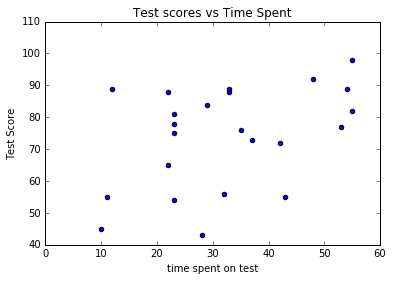

In [47]:
plt.scatter(time_spent,test_scores)
plt.title('Test scores vs Time Spent')
plt.xlabel('time spent on test')
plt.ylabel('Test Score')
plt.show()

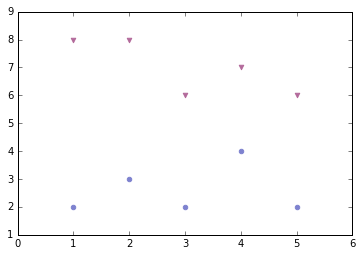

In [48]:
x = [1,2,3,4,5]
y1= [2,3,2,4,2]
y2 = [8, 8, 6, 7, 6]

plt.scatter(x, y1,marker ='o', color = '#7e82cf')
plt.scatter(x,y2,marker = 'v', color = '#b36a9b')
plt.show()

# Stack Plots

Way to visualize the entire whole but also see how the parts make up the whole.  Pie chart (1-dimensional) with extra axis (2-dimensional).  

In [49]:
year = list(range(1,11))
year

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

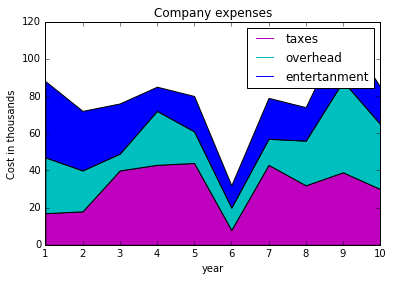

In [50]:
# In the thousands
taxes = [17, 18, 40, 43, 44, 8, 43, 32, 39, 30]
overhead = [30, 22, 9, 29, 17, 12, 14, 24, 49, 35]
entertainment = [41, 32, 27, 13, 19, 12, 22, 18, 28, 20]

# Hack to add legend
plt.plot([],[], color = 'm', label = 'taxes')
plt.plot([], [], color = 'c', label = 'overhead')
plt.plot([],[], color = 'b', label = 'entertanment')


plt.stackplot(year,taxes,overhead, entertainment, colors = ['m', 'c', 'b'])
#plt.figure(figsize=(15,15))
plt.legend()
plt.title('Company expenses')
plt.xlabel('year')
plt.ylabel('Cost in thousands')
plt.show()

# Pie Charts

Great to automatically convert to percentages of the pie.  Good inclusion to matplotlib library. 

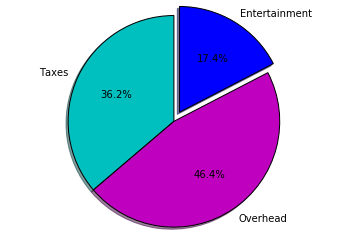

In [51]:
labels = 'Taxes', 'Overhead', 'Entertainment'
sizes = [25,32,12]
colors = ['c', 'm', 'b']

#explode pulls charts out, shadow gives 3D, autopct adds percent
plt.pie(sizes, labels = labels, colors = colors, startangle=90,shadow=True,explode=(0,0,0.1),autopct= '%1.1f%%')
plt.axis('equal')
plt.show()

# Loading data from a csv

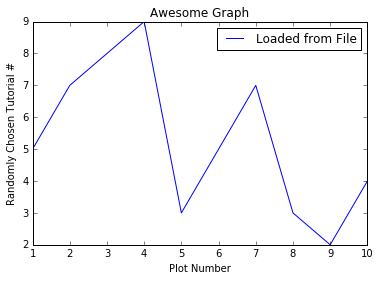

In [52]:
import csv

x = []
y = []

with open('./example.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x,y, label = 'Loaded from File')
plt.xlabel('Plot Number')
plt.ylabel('Randomly Chosen Tutorial #')
plt.legend()
plt.title('Awesome Graph')
plt.show()

# Using Numpy to load data from files

Efficient and fast library to load files and manipulate data if needed.  C coded module that is extremely efficient and fast.  C extensions.

In [53]:
import numpy as np

In [54]:
x,y = np.loadtxt('./example.txt', delimiter = ',', unpack = True)

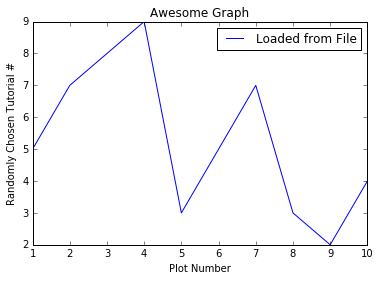

In [55]:
plt.plot(x,y, label = 'Loaded from File')
plt.xlabel('Plot Number')
plt.ylabel('Randomly Chosen Tutorial #')
plt.legend()
plt.title('Awesome Graph')
plt.show()

# Section 2

### Getting a decent data set

In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt
import requests
import numpy as np
import re
import urllib

In [57]:
'''def bytespdate2num(fmt, encoding='utf-8'):
    string_converter = mdates.strpdate2num(fmt)
    
    def bytes_converter(b):
        s = b.decoding(encoding)
        return str_converter(s)
    return bytes_converter'''
    
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    
    
    plt.plot_date(date, closep, '-')
    plt.figure(figsize=(15,15))
    plt.show()

Enter a stockxon
Currently pulling: xon


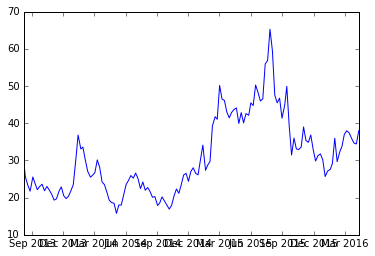

In [58]:
stock = input("Enter a stock")
graph_data(stock)

# Modifying and adding labels

In [59]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure()
    #Making the grid
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    
    
    plt.plot_date(date, closep, '-')
    
    # Adding label customization; rotating 45 degrees
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    ax1.grid(True) #,color = 'g', linestyle='-', linewidth=3)
    plt.show()

Currently pulling: xon


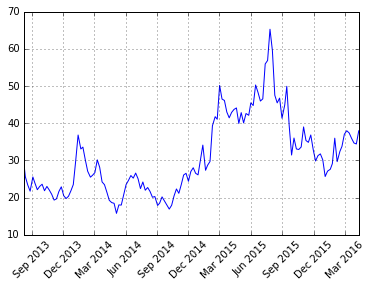

In [60]:

graph_data(stock)

# Converting unix time and adjusting subplots

### Customizing subplot

In [61]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure()
    #Making the grid
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    
    
    plt.plot_date(date, closep, '-')
    
    # Adding label customization
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    ax1.grid(True)
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
    
    

    plt.show()

Currently pulling: xon


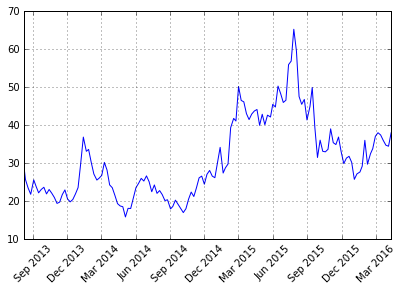

In [62]:
graph_data(stock)

### Converting to Unix time

In [63]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure()
    #Making the grid
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    print('Currently pulling:', stock)
    
    # change url to 1 day
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1d/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    '''date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    '''
    # date conversion
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True)
    date_conv = np.vectorize(dt.datetime.fromtimestamp)
    date = date_conv(date)
    ax1.plot_date(date, closep, '-')
    
    # Adding label customization
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    ax1.grid(True)
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
    
    

    plt.show()

Currently pulling: xon


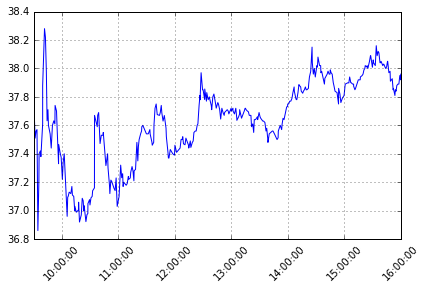

In [64]:

graph_data(stock)

# Customizing the ticks and doing coloring

In [65]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure()
    
    #Making the grid
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    
    plt.xlabel('Date')
    print('Currently pulling:', stock)
    
    # change url to 1 day
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1d/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    '''date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    '''
    # date conversion
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True)
    date_conv = np.vectorize(dt.datetime.fromtimestamp)
    date = date_conv(date)
    
    #customizing one axis; group together
    ax1.plot_date(date, closep, '-')
    ax1.grid(True)
    ax1.yaxis.label.set_color('m')
    ax1.xaxis.label.set_color('c')
    # Adding label customization
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
    
    

    plt.show()

Currently pulling: xon


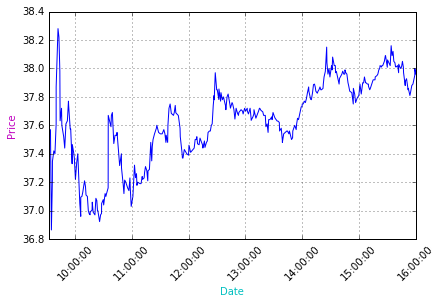

In [66]:

graph_data(stock)

### Modifying the ticks

In [67]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure()
    
    #Making the grid
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    
    plt.xlabel('Date')
    print('Currently pulling:', stock)
    
    # change url to 1 day
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1d/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    '''date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    '''
    # date conversion
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True)
    date_conv = np.vectorize(dt.datetime.fromtimestamp)
    date = date_conv(date)
    
    #customizing one axis; group together
    ax1.plot_date(date, closep, '-')
    ax1.grid(True)
    ax1.yaxis.label.set_color('m')
    ax1.xaxis.label.set_color('c')
    ax1.set_yticks([34, 34.5, 35])
    # Adding label customization
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
    
    

    plt.show()

Currently pulling: xon


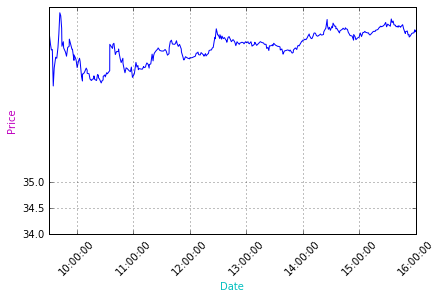

In [68]:

graph_data(stock)

# Fills and Alpha

Alpha is a measure of opaqueness; setting that makes clustered and crowded areas easier to understand and manage.  

In [69]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure()
    
    #Making the grid
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    
    plt.xlabel('Date')
    print('Currently pulling:', stock)
    
    # change url to 1 day
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1d/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    '''date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    '''
    # date conversion
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True)
    date_conv = np.vectorize(dt.datetime.fromtimestamp)
    date = date_conv(date)
    
    #customizing one axis; group together
    ax1.plot_date(date, closep, '-')
    #ax1.fill_between(date,closep,34, alpha = 0.5)
    #custom color
    ax1.fill_between(date,closep,34.5,where=(closep>= 34.5), facecolor = 'g', alpha=0.5)
    ax1.fill_between(date,closep,34.5,where=(closep<= 34.5), facecolor = 'r', alpha=0.5)
    ax1.grid(True)
    ax1.yaxis.label.set_color('m')
    ax1.xaxis.label.set_color('c')
    ax1.set_yticks([34, 34.5, 35])
    # Adding label customization
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
    
    

    plt.show()

Currently pulling: xon


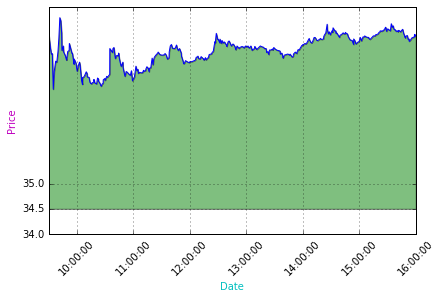

In [70]:
#stock = input('Enter a stock: ')
graph_data(stock)

# Customization (spines, colors, etc.)

When we want to modify spines, we have to reference it specifically.  Spines are the edges around the graph.  This customization is useful to visualize notifications when values or conditions are met.  Visualize the conditions.

In [71]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure()
    
    #Making the grid
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    
    plt.xlabel('Date')
    print('Currently pulling:', stock)
    
    # change url to 1 day
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1d/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    '''date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    '''
    # date conversion
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True)
    date_conv = np.vectorize(dt.datetime.fromtimestamp)
    date = date_conv(date)
    
    #customizing one axis; group together
    
    
    ax1.plot_date(date, closep, '-')
    #ax1.fill_between(date,closep,34, alpha = 0.5)
    #custom color
    ax1.fill_between(date,closep,34.85,where=(closep>= 34.85), facecolor = 'g', alpha=0.5)
    ax1.fill_between(date,closep,34.65,where=(closep<= 34.55), facecolor = 'r', alpha=0.5)
    ax1.axhline(34.65, color='red')
    ax1.axhline(34.85, color = 'green')
    
    ax1.grid(True)
    ax1.yaxis.label.set_color('m')
    ax1.xaxis.label.set_color('c')
    ax1.set_yticks([34, 34.5, 35])
    ax1.spines['left'].set_color('c')
    ax1.spines['bottom'].set_color('c')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(5)
    ax1.spines['bottom'].set_linewidth(5)
    # Adding label customization
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
    
    

    plt.show()

Currently pulling: xon


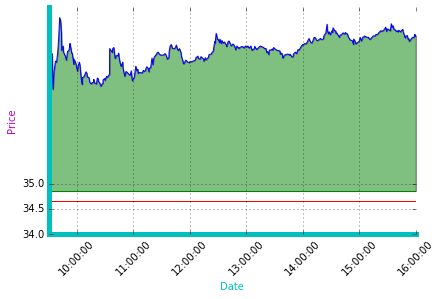

In [72]:

graph_data(stock)

# Candlestick OHLC Charts

OHLC = Open, high, low, close data.  Shows changes in values with respect to time and variables.  

In [73]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure()
    
    #Making the grid
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    
    plt.xlabel('Date')
    print('Currently pulling:', stock)
    
    # change url to 1 day
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=3m/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    
    # date conversion
#     date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True)
#     date_conv = np.vectorize(dt.datetime.fromtimestamp)
#     date = date_conv(date)


    x = 0
    y = len(date)
    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1
        
    
    #customizing one axis; group together
    
    
    candlestick_ohlc(ax1, new_list, width = .6, colorup='g', colordown='#ff1717')
    
    ax1.grid(True)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.ylabel('Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
    plt.figure(figsize=(15,10))
    

    plt.show()

Currently pulling: xon


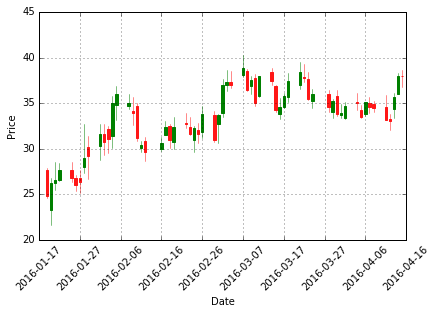

In [74]:

graph_data(stock)

# Matplotlib Styles

Matplotlib styles 

In [75]:
from matplotlib import style

In [76]:
style.use('mystyle')
print(plt.style.available)
print(plt.__file__)

['seaborn-paper', 'fivethirtyeight', 'seaborn-bright', 'seaborn-colorblind', 'grayscale', 'seaborn-deep', 'seaborn-whitegrid', 'mystyle', 'seaborn-dark-palette', 'seaborn-white', 'dark_background', 'seaborn-pastel', 'seaborn-poster', 'seaborn-dark', 'seaborn-talk', 'seaborn-muted', 'classic', 'bmh', 'seaborn-notebook', 'ggplot', 'seaborn-darkgrid', 'seaborn-ticks']
/Users/linwood/anaconda/envs/dataVizClass/lib/python3.5/site-packages/matplotlib/pyplot.py


Currently pulling: xon


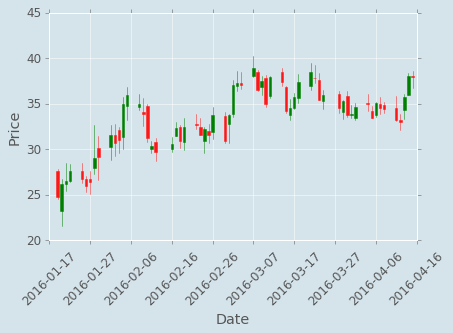

In [77]:
style.use('mystyle')
graph_data(stock)

# Custom Matplotlib Styles

Never start from scratch but start from a default and edit what you need to edit.  I'll try to make an economist style plot.  

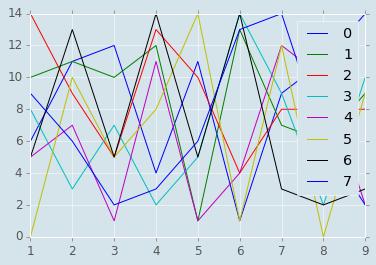

In [78]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import random

style.use('mystyle')
for label in range(8):
    x = []
    y = []
    
    for i in range(1,10):
        ys = random.randrange(0,15)
        xs = i
        x.append(xs)
        y.append(ys)
        
    plt.plot(x,y, label=label)

plt.legend()
plt.show()

# Animation

Great feature to animate plots; function automatically checks source file for new data and plots at designated refresh rate.  You can control the style and annotations.  

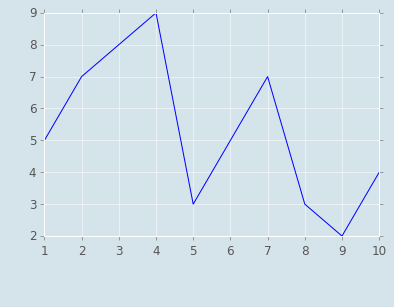

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.animation as animation
%matplotlib inline
style.use('mystyle')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pull_data = open('./example.txt','r').read()
    
    data_list = pull_data.split('\n')
    xs = []
    ys = []
    
    for line in data_list:
        if len(line)>1:
            x,y=line.split(',')
            xs.append(int(x))
            ys.append(int(y))
    
    ax1.clear()
    ax1.plot(xs,ys)
    
ani = animation.FuncAnimation(fig,animate,interval =1000)
plt.show()

# Adding Text 

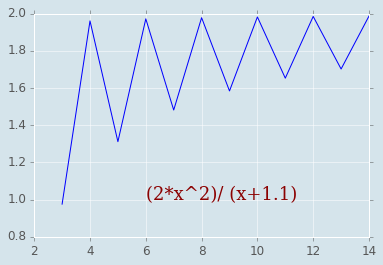

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('mystyle')

xs = []
ys = []
for i in range(3,15):
    x=i
    y=(2*x^2)/ (x+1.1)
    
    xs.append(x)
    ys.append(y)
    
plt.plot(xs,ys)

font = {'family':'serif',
       'color':'darkred',
       'size':18}
plt.text(6,1, "(2*x^2)/ (x+1.1)",fontdict=font)


plt.show()

# Annotating specific plots

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt
import requests
import numpy as np
import re
import urllib
%matplotlib inline

from matplotlib import style

style.use('mystyle')

def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure()
    
    #Making the grid
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    
    plt.xlabel('Date')
    print('Currently pulling:', stock)
    
    # change url to 1 day
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=3m/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
    
    # date conversion
#     date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True)
#     date_conv = np.vectorize(dt.datetime.fromtimestamp)
#     date = date_conv(date)


    x = 0
    y = len(date)
    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1
        
    
    #customizing one axis; group together
    
    
    candlestick_ohlc(ax1, new_list, width = .6, colorup='g', colordown='#ff1717')
    
    ax1.grid(True)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
     
    # Adding custom annotations    
#     ax1.annotate('Oil Spill!!',(date[25],highp[25]),
#                 xytext=(0.8,0.9),textcoords ='axes fraction',
#                 arrowprops = dict(facecolor='#585858',color='#585858'))
    bbox_props = dict(boxstyle = 'round4, pad = 0.3',fc = 'y',ec='k',lw=2)
    ax1.annotate(str(closep[-1]),(date[-1],closep[-1]),
                xytext=(date[-1]+5,closep[-1]),bbox=bbox_props)
    
    plt.ylabel('Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2,hspace=.2)
    plt.figure(figsize=(15,10))
    

    plt.show()

Currently pulling: TSLA


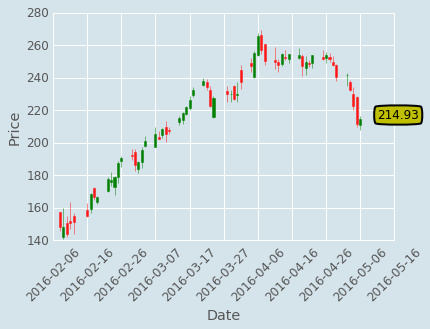

In [43]:
graph_data(stock='TSLA')

# Subplots in matplotlib


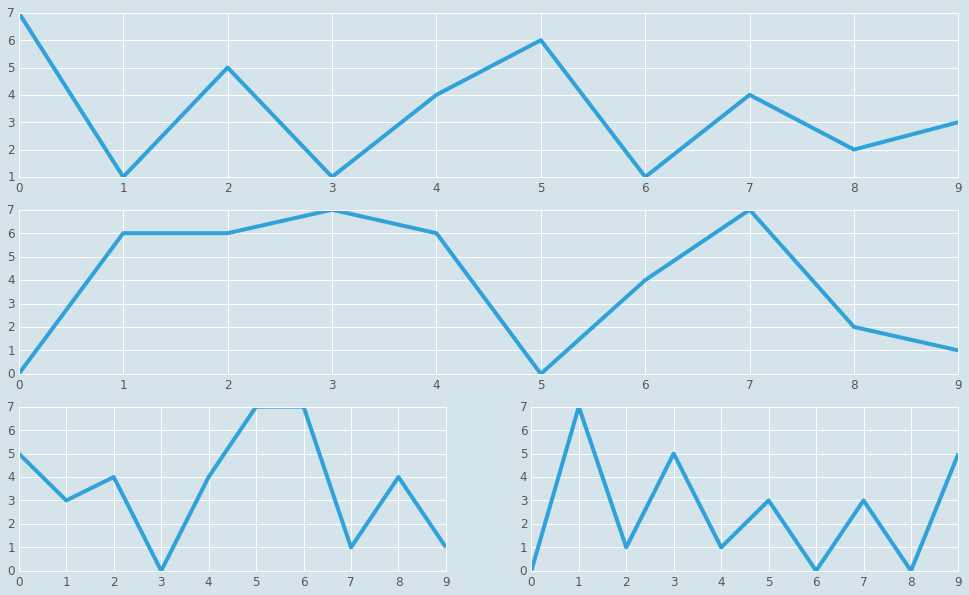

In [54]:
import random
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))

def create_plots():
    xs = []
    ys = []
    
    for i in range(10):
        x = i 
        y = random.randrange(8)
        
        xs.append(x)
        ys.append(y)
    return xs,ys

# first digit is height (rows), second is width (columns), third is number of plot
# when combining subplots, intuitively break the figure into the nested size to get the numbering
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)

# intuitively break up the figure
ax3 = fig.add_subplot(325)
ax4 = fig.add_subplot(326)

x,y = create_plots()
ax1.plot(x,y)


x,y = create_plots()
ax2.plot(x,y)

x,y = create_plots()
ax3.plot(x,y)

x,y = create_plots()
ax4.plot(x,y)

plt.show()

### Subplot to Grid

More difficult to implement, but does the same as what's done above. Subplot to grid is you start off by specifying the grid and sometimes, the grid size (e.g. 6 by 1 or 6 X 1).  Specify height and weight of entire chart, and then the start location, the row span (down direction) and column span (left to right)

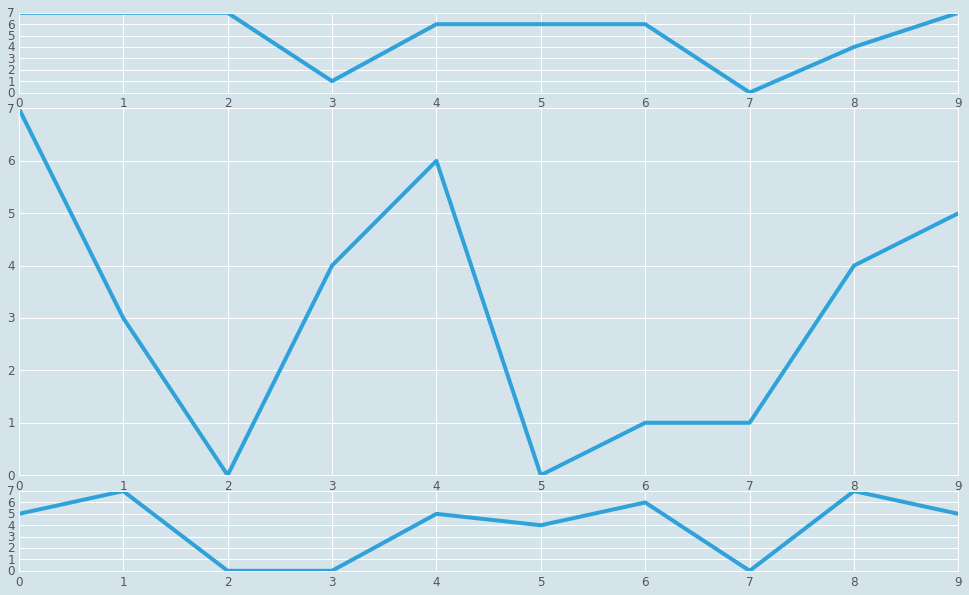

In [55]:
[-start:]

# Adding changes to candlestick; customizing subplots

When defining your label, put it under the graphing and plotting functions.  

In [66]:
[-start:]

Currently pulling: XON


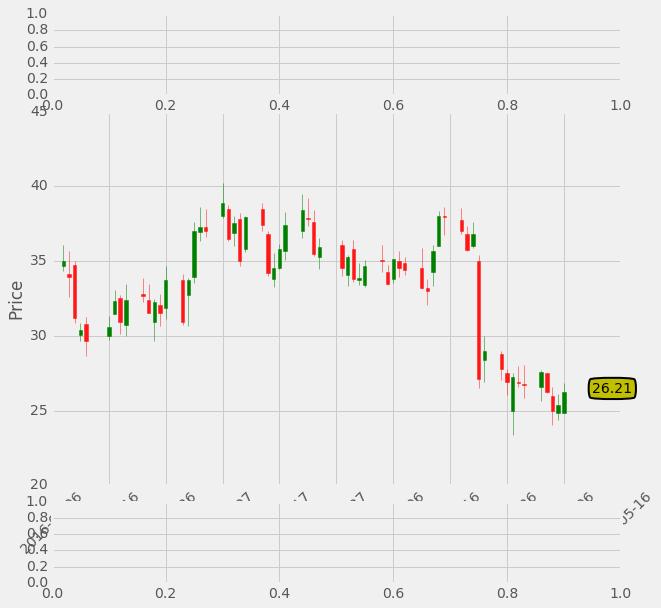

In [67]:
graph_data('XON')

# Creating Moving Averages; showing data on the axes

Moving averages "smooth" data. 

* General Rule: keep all your definitons to modify data together

> When you see this error "ValueError: x and y must have same first dimension", compare the length of the input data

In [77]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt
import requests
import numpy as np
import re
import urllib
%matplotlib inline

from matplotlib import style

style.use('fivethirtyeight')

# constants for length of days to calculate the moving average
MA1 = 10
MA2 = 30

def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def moving_average(values,window):
    weights = np.repeat(1.0,window)/window
    smas = np.convolve(values,weights,'valid')
    return smas

def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure(figsize=(10,10))
    
    #Making the grid
    ax1 = plt.subplot2grid((6,1), (0,0),rowspan = 1, colspan=1)
    ax2 = plt.subplot2grid((6,1),(1,0),rowspan=4,colspan=1)
    
    plt.ylabel('Price')
    
    ax3 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1)
    
    
    print('Currently pulling:', stock)
    
    # change url to 1 day
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=6m/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
   

    
    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    
    start = len(date[MA2-1:])
    print (start)
    
    x = 0
    y = len(date)
    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1
        
    
    #customizing one axis; group together
    
    
    candlestick_ohlc(ax2, new_list, width = .6, colorup='g', colordown='#ff1717')
    
    ax2.grid(True)
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
     
 
    bbox_props = dict(boxstyle = 'round4, pad = 0.3',fc = 'y',ec='k',lw=2)
    ax2.annotate(str(closep[-1]),(date[-1],closep[-1]),
                xytext=(date[-1]+5,closep[-1]),bbox=bbox_props)
    
    print (len(date))
    print (len(ma1))
    ax3.plot(date[-start:],ma1[-start:])
    ax3.plot(date[-start:],ma2[-start:])
    
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2,hspace=.2)
    plt.figure(figsize=(15,10))
    

    plt.show()

Currently pulling: XON
94
123
114


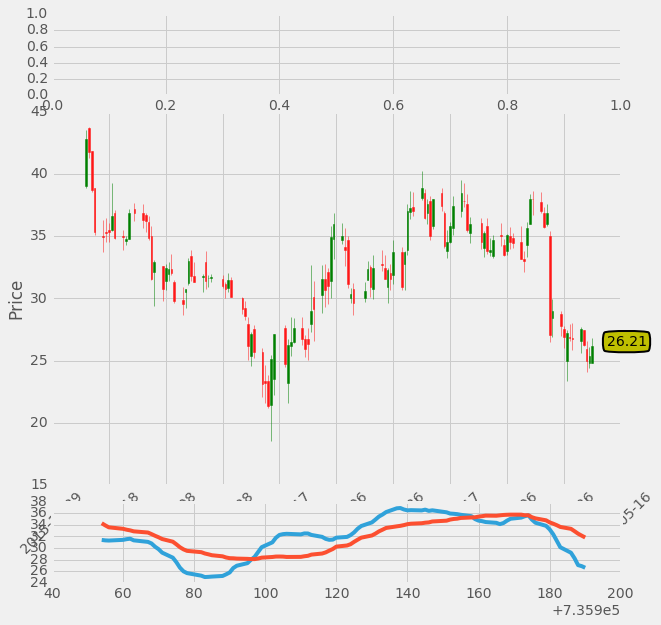

In [78]:
graph_data('XON')

# Adding extra grids or subplots: Creating a volatility indicators (HiLos)

This is useful for customization and also to demonstrate Python's ability to communicate complex topics in one visualization.

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt
import requests
import numpy as np
import re
import urllib
%matplotlib inline

from matplotlib import style

style.use('fivethirtyeight')

# constants for length of days to calculate the moving average
MA1 = 10
MA2 = 30

def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def moving_average(values,window):
    weights = np.repeat(1.0,window)/window
    smas = np.convolve(values,weights,'valid')
    return smas

def highs_minus_low(highs,lows):
    return highs-lows



def graph_data(stock):
    
    # Figure setting to customize even more
    fig = plt.figure(figsize=(10,10))
    
    #Making the grid
    ax1 = plt.subplot2grid((6,1), (0,0),rowspan = 1, colspan=1)
    ax2 = plt.subplot2grid((6,1),(1,0),rowspan=4,colspan=1)
    
    plt.ylabel('Price')
    
    ax3 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1)
    
    
    print('Currently pulling:', stock)
    
    # change url to 1 day
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=6m/csv'
    source_code = requests.get(url).content.decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = re.split(r'[;,:\s]\s*', each_line)
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)
    
    # get the data
    date,closep,highp,lowp,openp,volume= np.loadtxt(stock_data,delimiter=',', unpack = True, converters={0 : bytespdate2num('%Y%m%d')})
   

    
    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    
    start = len(date[MA2-1:])
    print (start)
    
    x = 0
    y = len(date)
    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1
    h_l = list(map(highs_minus_low,highp,lowp)    
    
    #customizing one axis; group together
    
    
    candlestick_ohlc(ax2, new_list, width = .6, colorup='g', colordown='#ff1717')
    
    ax2.grid(True)
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
     
 
    bbox_props = dict(boxstyle = 'round4, pad = 0.3',fc = 'y',ec='k',lw=2)
    ax2.annotate(str(closep[-1]),(date[-1],closep[-1]),
                xytext=(date[-1]+5,closep[-1]),bbox=bbox_props)
    
    print (len(date))
    print (len(ma1))
    ax3.plot(date[-start:],ma1[-start:])
    ax3.plot(date[-start:],ma2[-start:])
    
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    
    
    # Adjusting the subplot
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2,hspace=.2)
    plt.figure(figsize=(15,10))
    

    plt.show()

[5, 5, 6, 4, 1, -1, 7]
